<a href="https://colab.research.google.com/github/Deepa1812/Patient_clustering/blob/main/patient_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#upload csv file from my computer

from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded.keys())))
df.head()



Saving hospitals.csv to hospitals (2).csv


,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,NaN,Above,NaN,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


In [ ]:
#check for missing values

df.isnull().sum()

,0
Facility.Name,0
Facility.City,0
Facility.State,0
Facility.Type,0
Rating.Overall,0
Rating.Mortality,1375
Rating.Safety,2142
Rating.Readmission,900
Rating.Experience,1340
Rating.Effectiveness,938


In [ ]:
#scale the data

numeric_df = df.select_dtypes(include=np.number)


if numeric_df.empty:
    print("Error: No numeric columns found in the DataFrame.")

else:

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

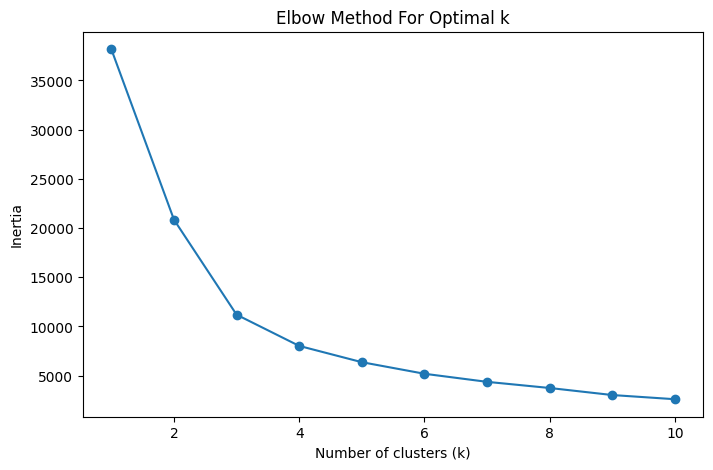

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Apply K-means clustering

k = 4  # Replace with your chosen number
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

In [ ]:
#Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5134488675568045


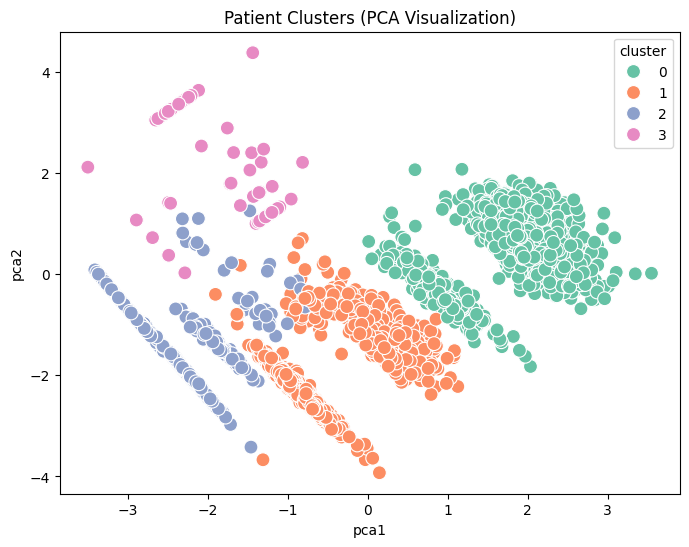

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['pca1'] = pca_data[:,0]
df['pca2'] = pca_data[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title('Patient Clusters (PCA Visualization)')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

# Group by 'cluster' and calculate the mean of numeric columns
cluster_profiles = numeric_df.groupby(df['cluster']).mean()

cluster_profiles

,Rating.Overall,Procedure.Heart Attack.Cost,Procedure.Heart Failure.Cost,Procedure.Pneumonia.Cost,Procedure.Hip Knee.Cost,cluster,pca1,pca2
cluster,,,,,,,,
0,2.906667,23925.564444,16890.708889,17771.600000,19678.154222,0.0,1.425007,0.427903
1,-0.341823,94.554960,106.825737,0.000000,3732.347185,1.0,-3.089703,0.890136
2,3.291204,51.556789,15592.902647,16547.380017,10378.436379,2.0,0.106303,-1.057980
3,0.431405,415.133884,2697.712397,17240.568595,730.201653,3.0,-1.695586,-0.641203


In [ ]:
#save your results to csv
df.to_csv('patient_clusters.csv', index=False)
from google.colab import files
files.download('patient_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip freeze > requirements.txt


In [ ]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>